In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [3]:
T = 10
fs = 8000 * 16

ts = np.linspace(0, T, T*fs, endpoint=False)
chirp = scipy.signal.chirp(ts, f0=2e6, t1=128*16, f1=20e6, method='linear')

f, t, Sxx = scipy.signal.spectrogram(chirp, fs=fs, window='nuttall',
                                     noverlap=256*8*2, nperseg=512*8*2,
                                     nfft=2048*16*8)

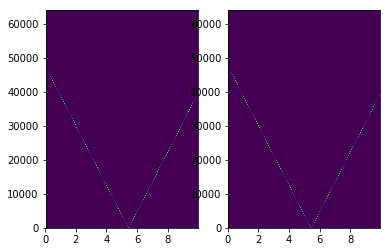

In [4]:
delayed = scipy.signal.chirp(ts, f0=2e6, t1=128*16,
                             f1=20e6, method='linear')
delayed = np.array([0] * 600 + list(delayed[600:]))

fd, td, Sxxd = scipy.signal.spectrogram(delayed, fs=fs, window='nuttall',
                                     noverlap=256*8*2, nperseg=512*8*2,
                                     nfft=2048*16*8)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.pcolormesh(t, f, Sxx)
ax2.pcolormesh(td, fd, Sxxd)

/home/rtse/anaconda3/envs/irss/lib/python3.6/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


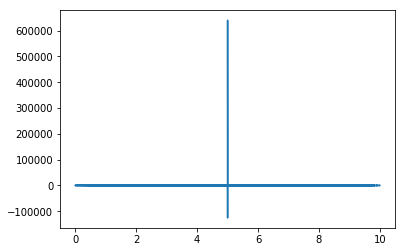

In [5]:
cor = scipy.signal.correlate(chirp, delayed)
plt.plot(np.linspace(0, 10, len(cor)), cor)

In [ ]:
rx = chirp + np.random.normal(0, 5)
fr, tr, Sxxr = scipy.signal.spectrogram(rx, fs=fs, window='nuttall',
                                     noverlap=256*8*2, nperseg=512*8*2,
                                     nfft=2048*16*8)
plt.pcolormesh(tr, fr, Sxxr)
plt.show()

cor = scipy.signal.correlate(rx, delayed)
plt.plot(np.linspace(0, 10, len(cor)), cor)
plt.show()